In [ ]:
import requests

# Define the URL of the FastAPI endpoint
url = 'http://localhost:8000'  # Replace with the actual URL if different

# Make a GET request to the endpoint
response = requests.get(url)
data = response.json()
Predicted_value = data['Predicted_Value']
Actual_Value = data['Actual_Value']
err = data['error']



In [46]:
import pandas as pd
data = {
    'Predicted Value': [Predicted_value],
    'Actual Value': [Actual_Value],
    'Error': [err]
}
df = pd.DataFrame(data)

In [47]:
df

,Predicted Value,Actual Value,Error
0,21676.302734,21646.150391,0.139297


In [1]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import pandas_datareader as pdr
import os
from dotenv import load_dotenv


In [ ]:
import requests
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2019-01-02&token=d964f7ed1e055b39c5de46cebbfc96a9d3e7d5f0", headers=headers)
print(requestResponse.json())

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key="d964f7ed1e055b39c5de46cebbfc96a9d3e7d5f0")
df

TypeError: concat() takes 1 positional argument but 2 were given

In [19]:
dotenv_path = ".env/.env"
load_dotenv(dotenv_path)

# Access the API token
key = os.getenv('API')


In [20]:
key

'd964f7ed1e055b39c5de46cebbfc96a9d3e7d5f0'

In [4]:
import yfinance as yf
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'}
# yf.pdr_override['default_scheme'] = 'https'
# yf.pdr_override['default_user_agent'] = headers['User-Agent']
# Get historical market data for AAPL
df = yf.download('^CRSLDX')
df


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX
Date,,,,,
2005-09-26,2245.396973,2247.497068,2195.747135,2195.747135,0
2005-09-27,2259.347168,2274.797099,2241.297143,2246.247087,0
2005-09-28,2280.347168,2282.396970,2250.647011,2261.297144,0
2005-09-29,2281.747070,2302.297093,2275.547127,2289.547109,0
2005-09-30,2273.997070,2284.896959,2242.847208,2284.097155,0
...,...,...,...,...,...
2025-02-13,20904.349609,21122.000000,20866.500000,20926.000000,21300900
2025-02-14,20633.099609,20984.699219,20476.650391,20964.599609,20478700


Price,Close,High,Low,Open,Volume
Ticker,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX
Date,,,,,
2005-09-26,2245.396973,2247.497068,2195.747135,2195.747135,0
2005-09-27,2259.347168,2274.797099,2241.297143,2246.247087,0
2005-09-28,2280.347168,2282.396970,2250.647011,2261.297144,0
2005-09-29,2281.747070,2302.297093,2275.547127,2289.547109,0
2005-09-30,2273.997070,2284.896959,2242.847208,2284.097155,0
...,...,...,...,...,...
2025-02-03,21402.550781,21445.949219,21286.699219,21422.849609,22552300
2025-02-04,21727.449219,21743.550781,21474.449219,21551.400391,21541600


In [3]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df

,Close,High,Low,Open,Volume
Date,,,,,
2005-09-26,2245.396973,2247.497068,2195.747135,2195.747135,0
2005-09-27,2259.347168,2274.797099,2241.297143,2246.247087,0
2005-09-28,2280.347168,2282.396970,2250.647011,2261.297144,0
2005-09-29,2281.747070,2302.297093,2275.547127,2289.547109,0
2005-09-30,2273.997070,2284.896959,2242.847208,2284.097155,0
...,...,...,...,...,...
2025-02-10,21371.300781,21659.250000,21301.849609,21636.199219,14732900
2025-02-11,20950.449219,21376.449219,20860.599609,21366.250000,17841200
2025-02-12,20907.849609,21002.000000,20545.750000,20924.150391,25437300


In [39]:
df.columns = [col.split('_')[0] for col in df.columns]

In [40]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2005-09-26,2245.396973,2247.497068,2195.747135,2195.747135,0
2005-09-27,2259.347168,2274.797099,2241.297143,2246.247087,0
2005-09-28,2280.347168,2282.396970,2250.647011,2261.297144,0
2005-09-29,2281.747070,2302.297093,2275.547127,2289.547109,0
2005-09-30,2273.997070,2284.896959,2242.847208,2284.097155,0
...,...,...,...,...,...
2025-02-03,21402.550781,21445.949219,21286.699219,21422.849609,22552300
2025-02-04,21727.449219,21743.550781,21474.449219,21551.400391,21541600
2025-02-05,21784.250000,21870.400391,21763.699219,21797.699219,19686800


In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0        2245.396973
1        2259.347168
2        2280.347168
3        2281.747070
4        2273.997070
            ...     
4765    21371.300781
4766    20950.449219
4767    20907.849609
4768    20904.349609
4769    20633.099609
Name: close, Length: 4770, dtype: float64

In [7]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(20633.099609375)

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df

NameError: name 'pdr' is not defined

In [3]:
df = pd.read_csv('Data.csv')
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (? Cr)'],
      dtype='object')


In [4]:
df = df.reset_index() ['Close']
df

0       11574.85
1       11691.80
2       11767.00
3       11737.90
4       11766.10
          ...   
1009    20910.95
1010    20924.75
1011    21245.50
1012    21297.50
1013    21580.90
Name: Close, Length: 1014, dtype: float64

In [6]:
df_num = df.values
df_num

array([11574.85, 11691.8 , 11767.  , ..., 21245.5 , 21297.5 , 21580.9 ])

In [4]:
df.shape

(1014,)

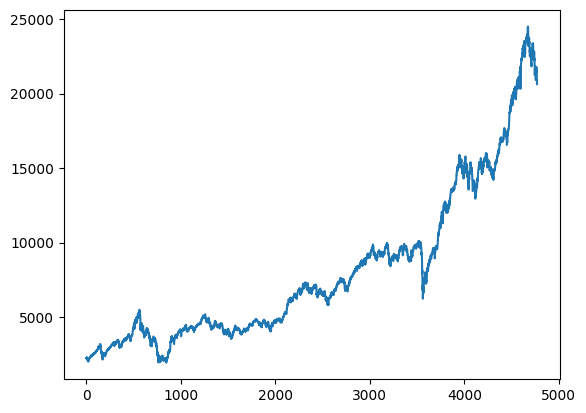

In [9]:
plt.plot(df)

## Feature scaling

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df

array([[0.01236347],
       [0.01298265],
       [0.01391474],
       ...,
       [0.84069941],
       [0.84054406],
       [0.82850459]])

In [12]:
df.shape

(4770, 1)

In [13]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [14]:
training_size, test_size

(3816, 954)

In [15]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(750, 60)
(750,)


(None, None)

In [13]:
print(X_test.shape), print(y_test.shape)

(142, 60)
(142,)


(None, None)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [46]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 0.0512 - val_loss: 0.0107
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0038 - val_loss: 0.0062
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0010 - val_loss: 0.0078
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 9.7189e-04 - val_loss: 0.0038
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 8.4478e-04 - val_loss: 0.0020
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 7.4309e-04 - val_loss: 0.0016
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 7.4602e-04 - val_loss: 0.0019
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 7.2888e-04 - val_loss: 0.0031
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 6.7321e-04 - val_loss: 0.0018
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 6.9256e-04 - val_loss: 0.0015
Epoch 12/100


In [16]:
from keras.models import load_model

In [49]:
from keras.models import load_model

# Save the model
model.save('lstm_model.h5')
print("Model saved to disk")

Model saved to disk


In [17]:
model = load_model('lstm_model.h5')

In [18]:
import tensorflow as tf

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [88]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

15735.691454967478

In [89]:
###23 Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

23037.31590905167

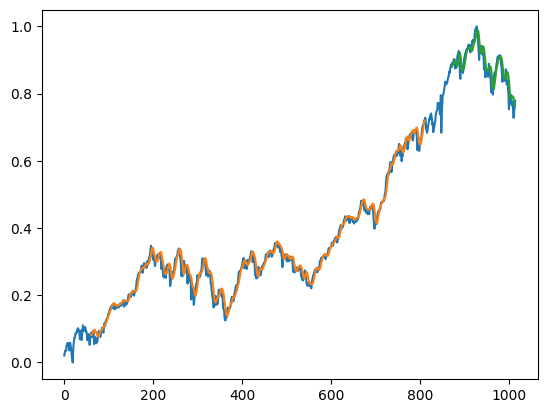

In [21]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
len(test_data)

203

In [1]:
x_input=test_data[143:].reshape(1,-1) 
x_input.shape

NameError: name 'test_data' is not defined

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
temp_input

[0.8889158361438478,
 0.8718670658228806,
 0.8596953275986208,
 0.8555837659630907,
 0.8358520595702754,
 0.8043161923528743,
 0.8079654401455152,
 0.8031376709992801,
 0.8110917427716093,
 0.7971844329076507,
 0.8278563037629314,
 0.8527113570048126,
 0.853389669938232,
 0.8631854181666605,
 0.8497442116033194,
 0.8628292091401721,
 0.8741104247982112,
 0.8881314183940276,
 0.894092235401114,
 0.9076168100344841,
 0.9102050096631171,
 0.9086816476562205,
 0.9104172192959188,
 0.9136951002311571,
 0.905983553753458,
 0.9137557315548146,
 0.9132631020500968,
 0.8938080260714691,
 0.8815794459812802,
 0.8677668725605368,
 0.8349691159195121,
 0.8420099283792488,
 0.8412823524953579,
 0.843377922619273,
 0.8445033915646671,
 0.8378301565046042,
 0.8392133085755429,
 0.8472772746220016,
 0.8728902194096024,
 0.8644321497593697,
 0.8278449353897459,
 0.8366554246087385,
 0.8283299859790063,
 0.8142900450945469,
 0.7955284398802531,
 0.7534237750577892,
 0.7714312781840917,
 0.77674788737731

In [25]:
last_val= temp_input[-1]
last_val

0.7789988252681044

In [26]:
from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<1):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
 

[0.7630687]
61
[[0.763068675994873]]


In [33]:
pred_val=scaler.inverse_transform(yhat)
last_val= scaler.inverse_transform([[last_val]])

In [34]:
print(pred_val), print(last_val)

[[0.7630687]]
[[0.77899883]]


(None, None)

In [35]:
last_val= last_val[0][0]
pred_val= pred_val[0][0]

In [37]:
last_val

np.float64(0.7789988252681039)

In [38]:
pred_Val=yhat[0,0]
print(pred_Val)

0.7630687


In [39]:
error = (pred_Val - last_val)/ last_val
error

np.float64(-0.02044951642609768)